In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data import *
from features import *
from stats import *
from preprocess import *
from model import *
from step import Step
import matplotlib.pyplot as plt

In [18]:
step = Step(load_mnm_feature)
step = Step(gt_n_trials, step, n=8)
step = Step(win_cts_by_trial, step, win_start=1500, win_end=5000, win_size=500, win_stride=500)
step = Step(win_cts_by_win, step)
step = Step(stat_tests, step)

In [19]:
step().keys()

/Users/jason/mambaforge/envs/nda2/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


dict_keys(['raw_df', 'cells', 'win_cts_by_trial', 'wins', 'win_cts', 'win_cts_by_win', 't_by_cell_win_pos', 'stats_by_cell_win'])

In [20]:
sbcw = step()['stats_by_cell_win']
wcbw = step()['win_cts_by_win']

In [28]:
top = sbcw.sort_values('anova_p').head(10).reset_index()
top

,cell,win,t_p,min_t_p,min_t_p_pos,anova_p,kruskal_p
0,ELV-PFC-MD-PRE-415,3,"[0.42608689963432467, 0.00577823566017398, 1.0...",1.044751e-11,2,1.001147e-13,9.073237e-09
1,ELV-PFC-MD-PRE-453,0,"[0.8814024014418467, 0.10725075329849326, 8.20...",8.202081e-12,2,5.624599e-13,7.309616e-11
2,ELV-PFC-MD-PRE-581,0,"[0.0005636227777789023, 0.026107887250420205, ...",1.244975e-10,4,2.159372e-11,3.063756e-09
3,ELV-PFC-PD-PRE-924,0,"[0.0005636227777789023, 0.026107887250420205, ...",1.244975e-10,4,2.159372e-11,3.063756e-09
4,ELV-PFC-MD-POST-1653,3,"[0.002239640863369463, 0.016655594701892578, 9...",9.461174e-07,2,2.608690e-11,5.624289e-10
5,ELV-PFC-PV-POST-2499,2,"[0.19196639836030624, 0.2700388838928598, 0.61...",6.921013e-16,4,4.139981e-11,1.834333e-08
6,ELV-PFC-MD-POST-1761,2,"[0.19196639836030624, 0.2700388838928598, 0.61...",6.921013e-16,4,4.139981e-11,1.834333e-08
7,ELV-PFC-PD-PRE-928,0,"[3.321097220445023e-05, 0.027390432697600157, ...",3.321097e-05,0,5.465238e-11,2.748824e-09
8,ELV-PFC-MD-PRE-585,0,"[3.321097220445023e-05, 0.027390432697600157, ...",3.321097e-05,0,5.465238e-11,2.748824e-09
9,ELV-PFC-MD-PRE-415,2,"[0.22549345569176907, 0.35779426580498663, 2.5...",2.552297e-10,2,1.235820e-09,3.773292e-06


In [40]:
wcbw.loc['ELV-PFC-MD-PRE-415',:,3].apply(lambda x: np.mean(x))

position
0    11.222222
1    17.000000
2    22.526316
3     8.368421
4    13.368421
5     9.375000
6     9.222222
7     8.176471
Name: win_cts, dtype: float64

In [41]:
wcbw

cell                position  win
ADR-PFC-AD-PRE-1    0         0               [0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0]
                              1               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                              2               [1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0]
                              3               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                              4               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                                                           ...                        
SCR-PFC-PD-PRE-990  7         2      [9.0, 0.0, 8.0, 0.0, 0.0, 3.0, 0.0, 0.0, 5.0, ...
                              3      [1.0, 2.0, 7.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, ...
                              4      [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              5      [0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, ...
                              6      [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
Name: win

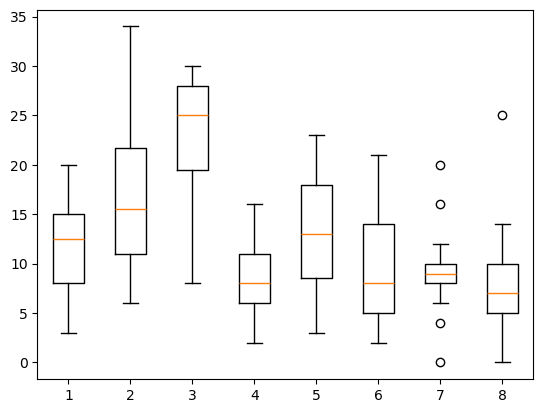

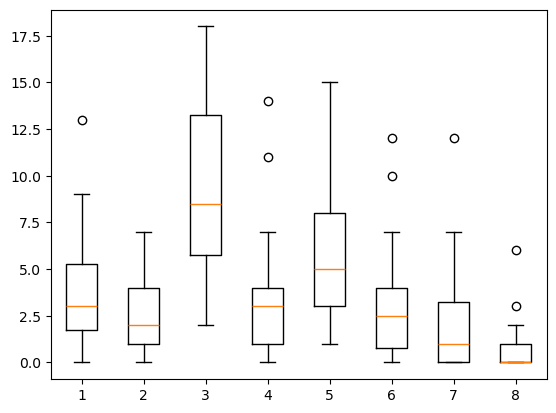

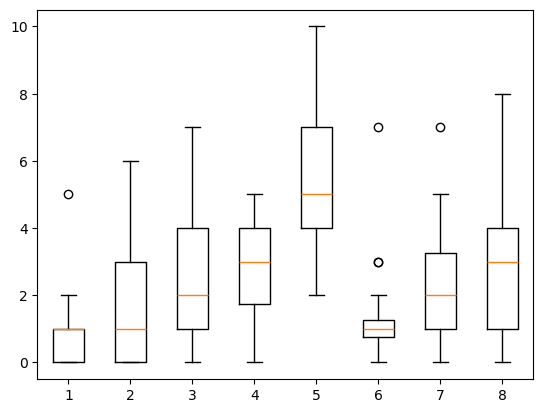

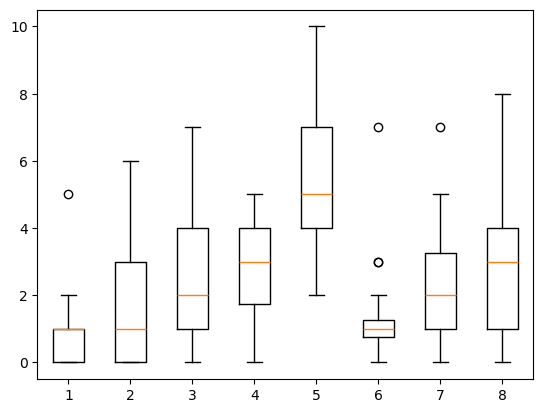

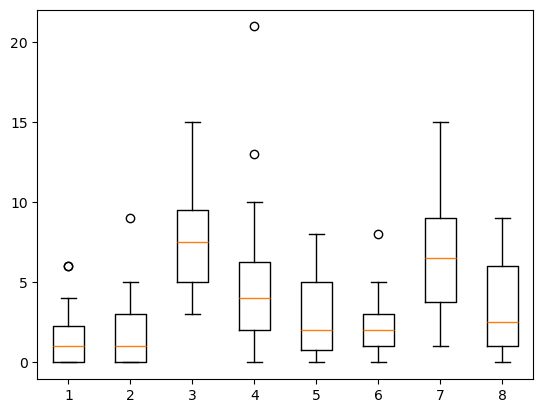

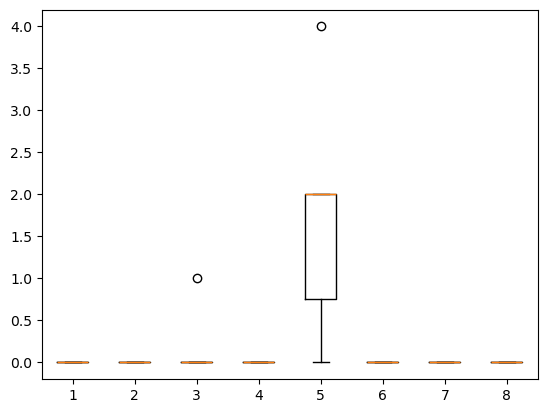

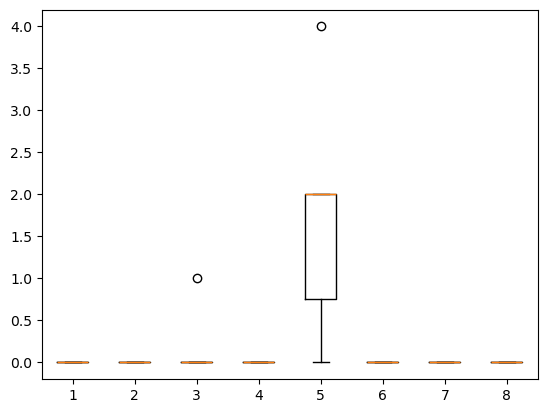

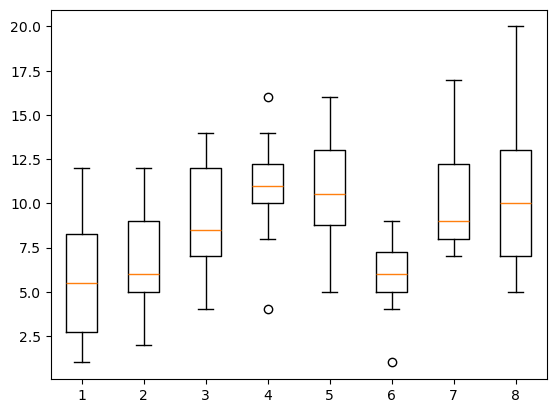

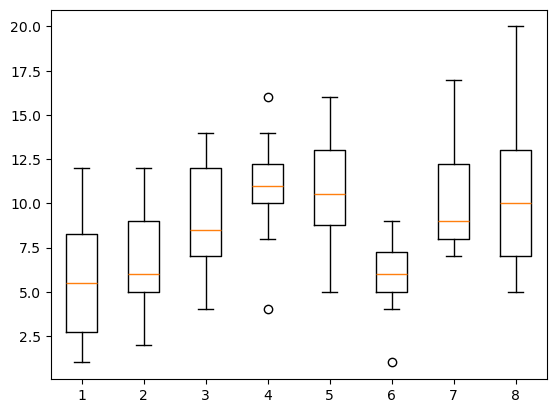

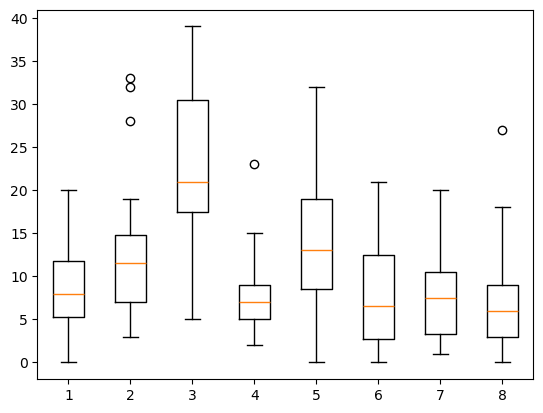

In [31]:
for i, row in top.iterrows():
    plt.boxplot(wcbw.loc[row.cell,:,row.win])
    plt.show()